# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
  print(data.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  
   Unnamed: 0          State  TotalPop Hispanic   White   Black Native  Asian  \
0           0           Utah   2903379   13.47%  79.41%   1.02%  1.08%  2.20%   
1           1        Vermont    626604    1.61%  93.98%   0.98%  0.30

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [4]:
print(df_list[0].columns)
print(df_list[0].dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

To understand why some data types are objects instead of integers or floats, we have to examine the first few rows of the DataFrame using the `.head()` method. This will help us to identify any non-numeric characters or formatting issues in the columns.

Here's a plan to convert these columns into the right types:

1. **Identify Non-Numeric Characters**: Look for symbols like `$`, `%`, or letters that might be causing the column to be read as an object.

2. **Remove Non-Numeric Characters**:
   - Use string manipulation or regular expressions to remove unwanted characters.
   - For example, remove `$` from the `Income` column and `%` from percentage columns.

3. **Convert to Numeric Types**:
   - Use `pd.to_numeric()` to convert cleaned columns to `float` or `int`.
   - Handle any errors or missing values during conversion.

4. **Verify Conversion**:
   - Check the data types again using `.dtypes` to ensure successful conversion.

By following these steps, the DataFrame will be ready for numerical analysis and visualization.

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    S

<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3431672054.py:17: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace({'\$': ''}, regex=True)


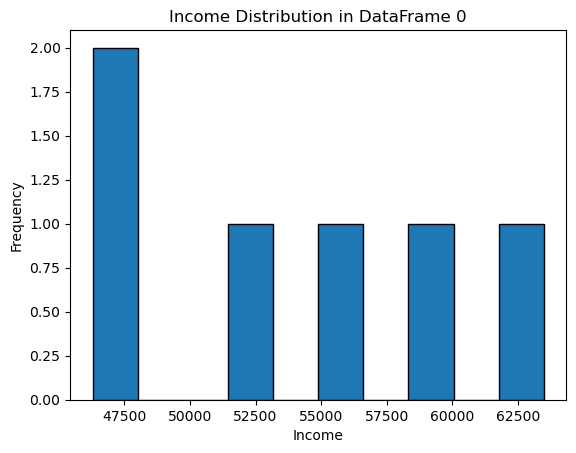

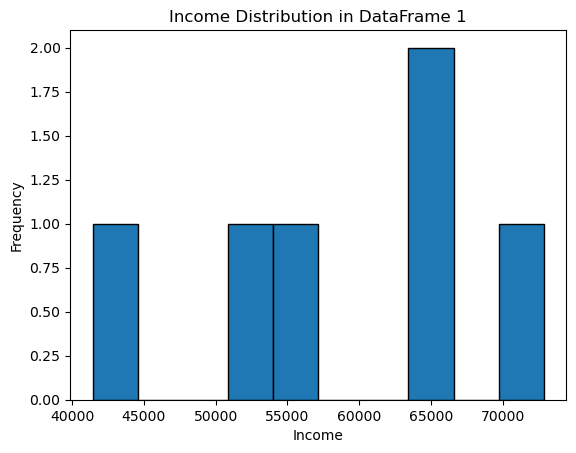

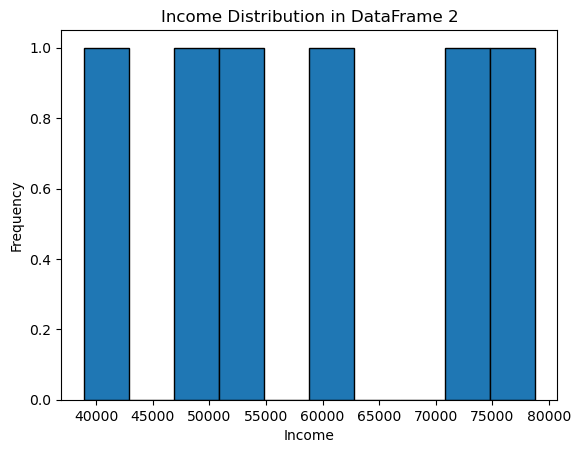

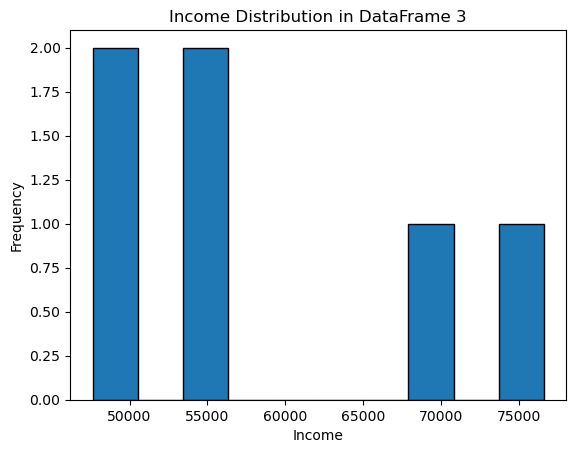

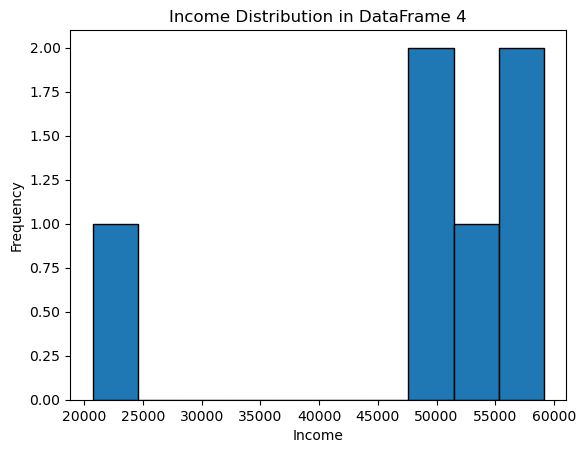

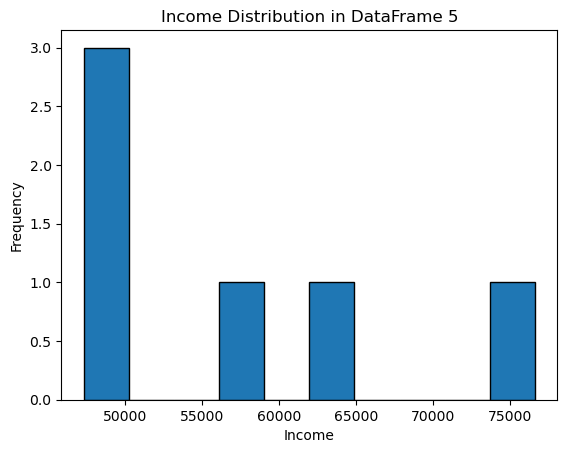

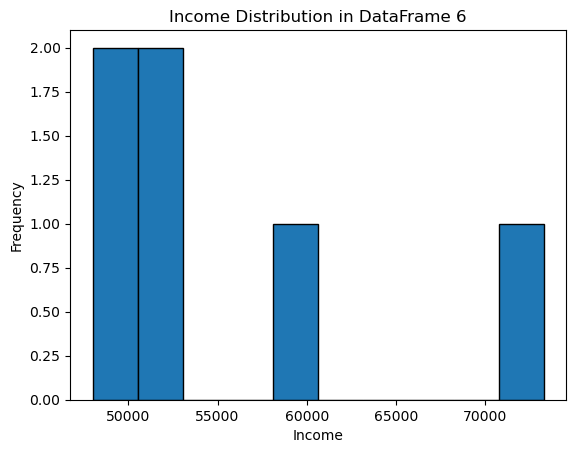

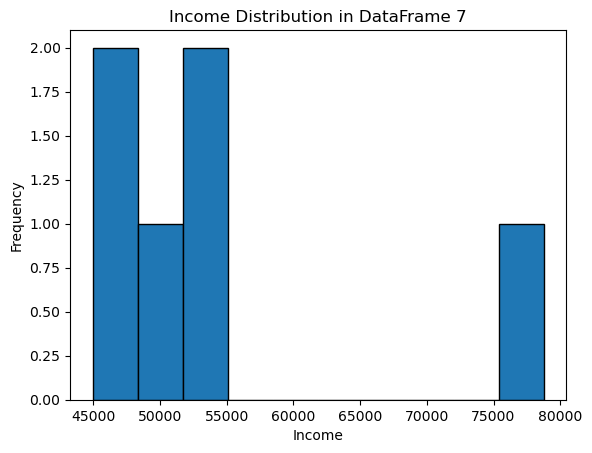

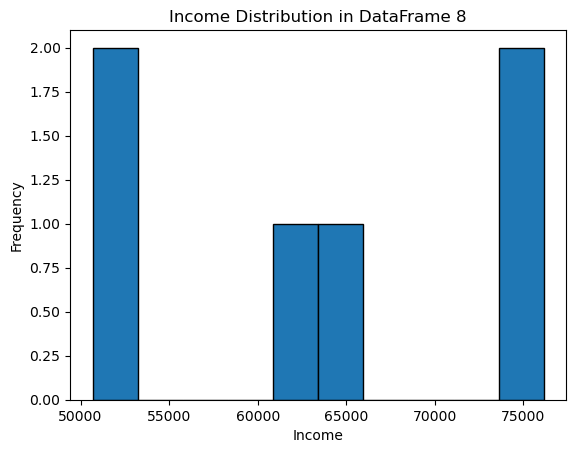

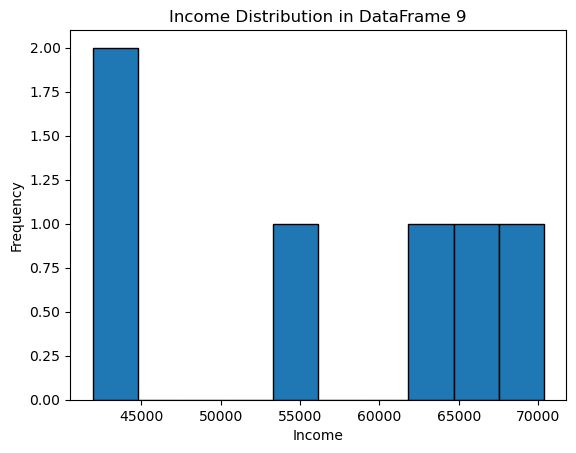

Updated DataFrame 0 with 'Men' and 'Women' columns:
          Men       Women
0    510388.0    543273.0
1   2322409.0   2455167.0
2    423477.0    419713.0
3   3167756.0   3331859.0
4  13171316.0  13367298.0
Updated DataFrame 1 with 'Men' and 'Women' columns:
         Men      Women
0  1459229.0  1444150.0
1   308573.0   318031.0
2  4060948.0  4195682.0
3  3487725.0  3497739.0
4   913631.0   937789.0
Updated DataFrame 2 with 'Men' and 'Women' columns:
         Men      Women
0  2872643.0        NaN
1  3249650.0  3455936.0
2  4861973.0  5038598.0
3  2692166.0  2727005.0
4  1451723.0  1536358.0
Updated DataFrame 3 with 'Men' and 'Women' columns:
         Men      Women
0  2964003.0  3081445.0
1   510163.0        NaN
2   929606.0   939759.0
3  1407735.0  1390901.0
4   653484.0   670717.0
Updated DataFrame 4 with 'Men' and 'Women' columns:
         Men      Women
0  5662893.0  5913084.0
1  1906944.0  1942789.0
2  1948453.0  1990780.0
3  6245344.0  6534215.0
4  1713860.0  1869213.0
Updated 

In [19]:
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt

files = glob.glob("states*.csv")

df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

print(data.head())

# Apply regex to remove '$' from the 'Income' column in each DataFrame
for df in df_list:
    df['Income'] = df['Income'].replace({'\$': ''}, regex=True)

# Display the first few rows of the 'Income' column in each DataFrame
print(df_list[0].head())

# Remove dollar signs and convert the column to numeric
for i, df in enumerate(df_list):
    if 'Income' in df.columns:
        df['Income'] = df['Income'].replace(r'[\$,]', '', regex=True)
        df['Income'] = pd.to_numeric(df['Income'], errors='coerce')  # Convert to numeric, setting errors to NaN
        print(f"Cleaned 'Income' column in DataFrame {i}:")
        print(df['Income'].head())

# The cleaned Income column for analysis or visualization
for i, df in enumerate(df_list):
    if 'Income' in df.columns:
        plt.figure()
        plt.hist(df['Income'].dropna(), bins=10, edgecolor='black')  # Drop NaN values before plotting
        plt.title(f'Income Distribution in DataFrame {i}')
        plt.xlabel('Income')
        plt.ylabel('Frequency')
        plt.show()

# Split the 'GenderPop' column into Men and Women'
for i, df in enumerate(df_list):
    if 'GenderPop' in df.columns:

        # Split the GenderPop column into two parts using the '_' delimiter
        gender_split = df['GenderPop'].str.split('_', expand=True)
        
        # Extract the Men and Women values, removing the 'M' and 'F' characters
        df['Men'] = gender_split[0].str.replace('M', '', regex=False).replace('', np.nan).astype(float)
        df['Women'] = gender_split[1].str.replace('F', '', regex=False).replace('', np.nan).astype(float)
        
        # Drop the original GenderPop column if it is no longer needed
        df.drop(columns=['GenderPop'], inplace=True)

        # Display the updated DataFrame
        print(f"Updated DataFrame {i} with 'Men' and 'Women' columns:")
        print(df[['Men', 'Women']].head())

for i, df in enumerate(df_list):
    if 'GenderPop' in df.columns:
        # Split the GenderPop column into two parts using the '_' delimiter
        gender_split = df['GenderPop'].str.split('_', expand=True)
        
        # Extract and clean the Men and Women values
        df['Men'] = gender_split[0].str.replace('M', '', regex=False).astype(float)
        df['Women'] = gender_split[1].str.replace('F', '', regex=False).astype(float)
        
        # Drop the original GenderPop column if no longer needed
        df.drop(columns=['GenderPop'], inplace=True)
        
        print(f"Updated DataFrame {i} with 'Men' and 'Women' columns converted to numeric types:")
        print(df[['Men', 'Women']].dtypes)
        print(df[['Men', 'Women']].head())

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

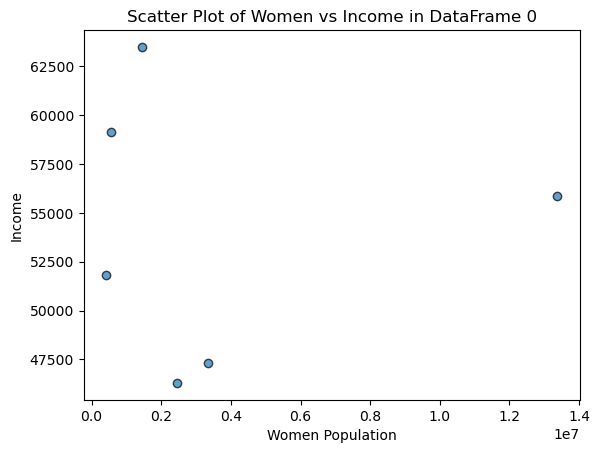

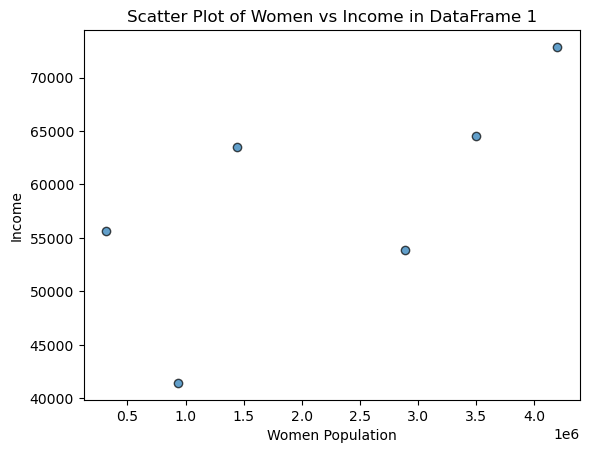

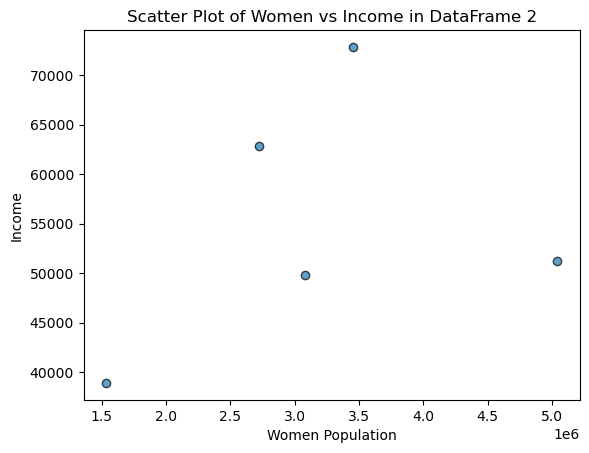

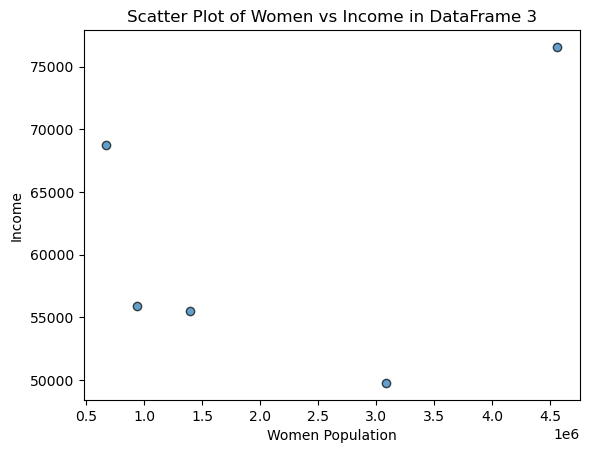

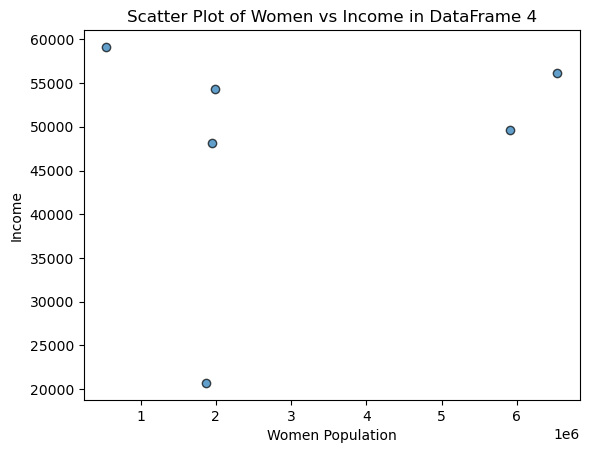

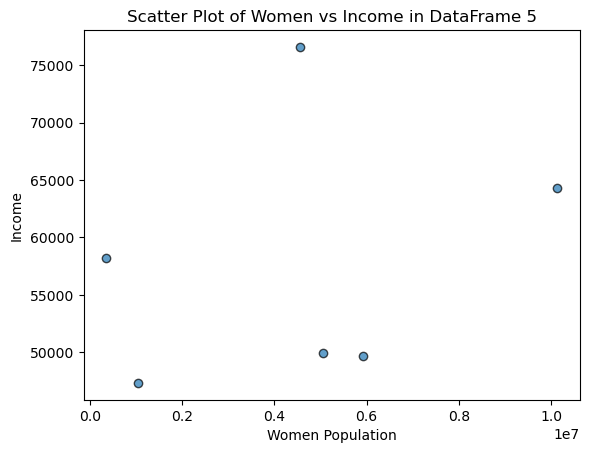

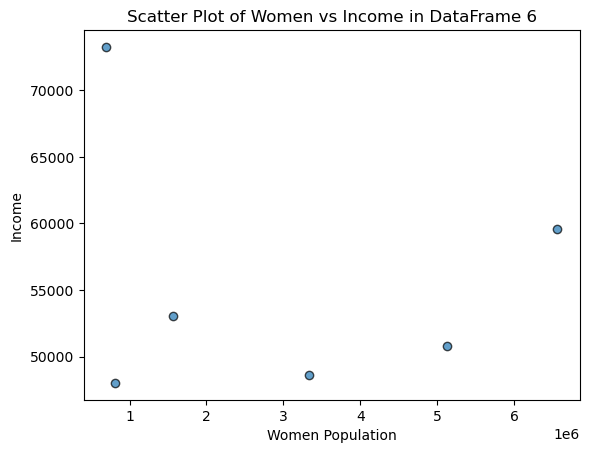

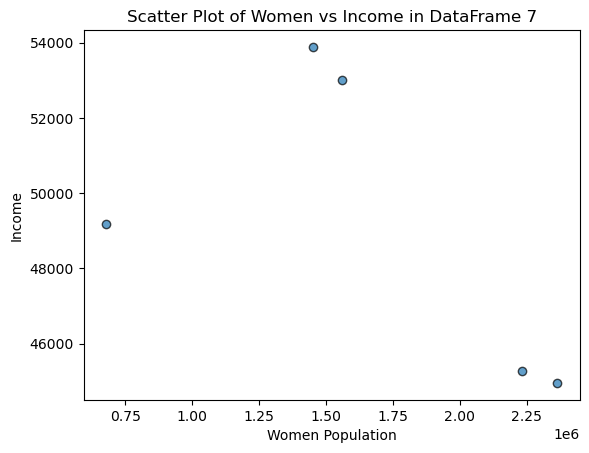

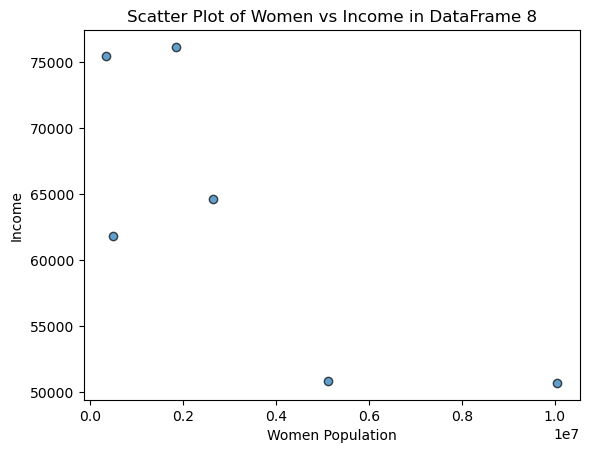

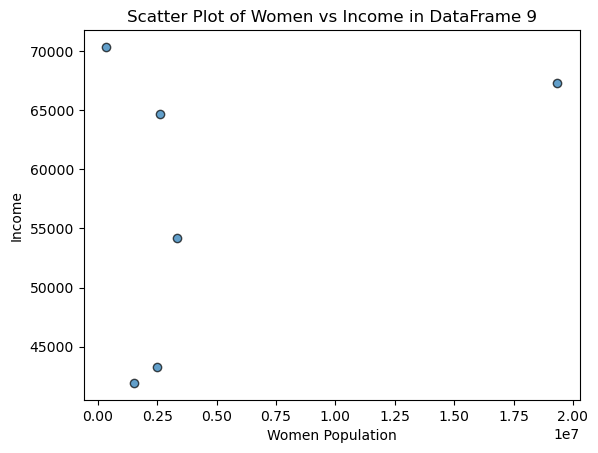

In [20]:
import matplotlib.pyplot as plt

for i, df in enumerate(df_list):
    if 'Women' in df.columns and 'Income' in df.columns:
        # Create scatter plot
        plt.scatter(df['Women'], df['Income'], alpha=0.7, edgecolors='black')
        
        # Add labels and title
        plt.title(f'Scatter Plot of Women vs Income in DataFrame {i}')
        plt.xlabel('Women Population')
        plt.ylabel('Income')
        
        # Show the plot
        plt.show()

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [21]:
for i, df in enumerate(df_list):
    if 'GenderPop' in df.columns:
        # Split the GenderPop column into Men and Women using the '_' delimiter
        gender_split = df['GenderPop'].str.split('_', expand=True)
        
        # Extract and clean the Men and Women values
        df['Men'] = gender_split[0].str.replace('M', '', regex=False).replace('', np.nan).astype(float)
        df['Women'] = gender_split[1].str.replace('F', '', regex=False).replace('', np.nan).astype(float)
        
        # Drop the original GenderPop column if no longer needed
        df.drop(columns=['GenderPop'], inplace=True)
        
        print(f"Updated DataFrame {i} with 'Men' and 'Women' columns:")
        print(df[['Men', 'Women']].dtypes)  # Check data types
        print(df[['Men', 'Women']].head())  # Display the first few rows

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

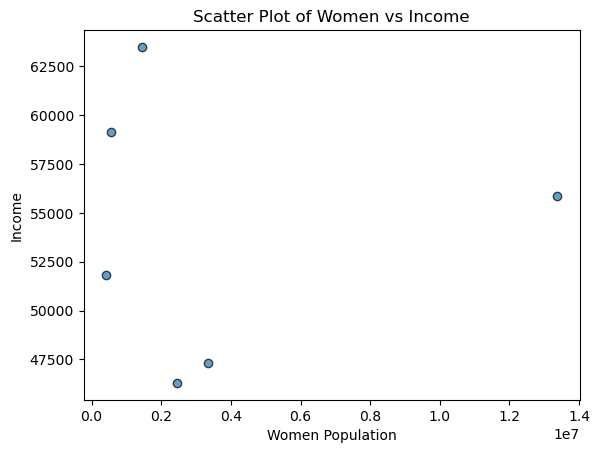

In [22]:
df = df_list[0]  # Replace 0 with the desired index
plt.scatter(df['Women'], df['Income'], alpha=0.7, edgecolors='black')
plt.title('Scatter Plot of Women vs Income')
plt.xlabel('Women Population')
plt.ylabel('Income')
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [23]:
for i, df in enumerate(df_list):
    if 'Women' in df.columns and 'Men' in df.columns and 'TotalPop' in df.columns:
        # Check for NaN values in the Women column
        print(f"Before filling NaN values in Women column (DataFrame {i}):")
        print(df['Women'].isna().sum(), "NaN values detected.")
        
        # Fill NaN values in the Women column
        df['Women'] = df['Women'].fillna(df['TotalPop'] - df['Men'])
        
        # Verify the results
        print(f"After filling NaN values in Women column (DataFrame {i}):")
        print(df['Women'].isna().sum(), "NaN values remaining.")
        print(df['Women'].head())  # Print the first few rows to confirm

Before filling NaN values in Women column (DataFrame 0):
0 NaN values detected.
After filling NaN values in Women column (DataFrame 0):
0 NaN values remaining.
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
Name: Women, dtype: float64
Before filling NaN values in Women column (DataFrame 1):
0 NaN values detected.
After filling NaN values in Women column (DataFrame 1):
0 NaN values remaining.
0    1444150.0
1     318031.0
2    4195682.0
3    3497739.0
4     937789.0
Name: Women, dtype: float64
Before filling NaN values in Women column (DataFrame 2):
1 NaN values detected.
After filling NaN values in Women column (DataFrame 2):
0 NaN values remaining.
0    3057895.0
1    3455936.0
2    5038598.0
3    2727005.0
4    1536358.0
Name: Women, dtype: float64
Before filling NaN values in Women column (DataFrame 3):
1 NaN values detected.
After filling NaN values in Women column (DataFrame 3):
0 NaN values remaining.
0    3081445.0
1     504536.0
2     939759.0
3

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [24]:
for i, df in enumerate(df_list):
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    print(f"DataFrame {i} contains {duplicates} duplicate rows.")

    # Optionally, display the duplicate rows for inspection
    if duplicates > 0:
        print(f"Duplicate rows in DataFrame {i}:")
        print(df[df.duplicated()])

    # Optionally, drop duplicates
    df.drop_duplicates(inplace=True)
    print(f"After removing duplicates, DataFrame {i} now has {len(df)} rows.")

DataFrame 0 contains 0 duplicate rows.
After removing duplicates, DataFrame 0 now has 6 rows.
DataFrame 1 contains 0 duplicate rows.
After removing duplicates, DataFrame 1 now has 6 rows.
DataFrame 2 contains 0 duplicate rows.
After removing duplicates, DataFrame 2 now has 6 rows.
DataFrame 3 contains 0 duplicate rows.
After removing duplicates, DataFrame 3 now has 6 rows.
DataFrame 4 contains 0 duplicate rows.
After removing duplicates, DataFrame 4 now has 6 rows.
DataFrame 5 contains 0 duplicate rows.
After removing duplicates, DataFrame 5 now has 6 rows.
DataFrame 6 contains 0 duplicate rows.
After removing duplicates, DataFrame 6 now has 6 rows.
DataFrame 7 contains 0 duplicate rows.
After removing duplicates, DataFrame 7 now has 6 rows.
DataFrame 8 contains 0 duplicate rows.
After removing duplicates, DataFrame 8 now has 6 rows.
DataFrame 9 contains 0 duplicate rows.
After removing duplicates, DataFrame 9 now has 6 rows.


11. Drop those duplicates using the `.drop_duplicates()` function.

In [25]:
for i, df in enumerate(df_list):
    # Count duplicates before dropping
    duplicates = df.duplicated().sum()
    print(f"DataFrame {i} contains {duplicates} duplicate rows before dropping.")
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Count rows after dropping duplicates
    print(f"DataFrame {i} now contains {len(df)} rows after dropping duplicates.")

DataFrame 0 contains 0 duplicate rows before dropping.
DataFrame 0 now contains 6 rows after dropping duplicates.
DataFrame 1 contains 0 duplicate rows before dropping.
DataFrame 1 now contains 6 rows after dropping duplicates.
DataFrame 2 contains 0 duplicate rows before dropping.
DataFrame 2 now contains 6 rows after dropping duplicates.
DataFrame 3 contains 0 duplicate rows before dropping.
DataFrame 3 now contains 6 rows after dropping duplicates.
DataFrame 4 contains 0 duplicate rows before dropping.
DataFrame 4 now contains 6 rows after dropping duplicates.
DataFrame 5 contains 0 duplicate rows before dropping.
DataFrame 5 now contains 6 rows after dropping duplicates.
DataFrame 6 contains 0 duplicate rows before dropping.
DataFrame 6 now contains 6 rows after dropping duplicates.
DataFrame 7 contains 0 duplicate rows before dropping.
DataFrame 7 now contains 6 rows after dropping duplicates.
DataFrame 8 contains 0 duplicate rows before dropping.
DataFrame 8 now contains 6 rows a

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

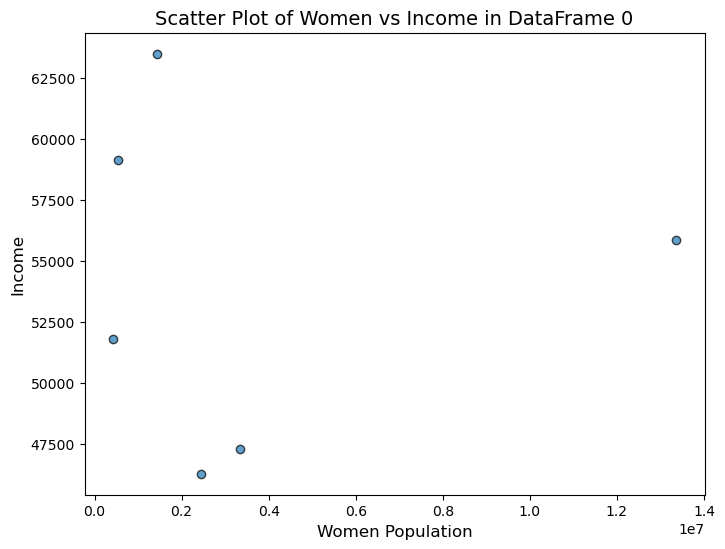

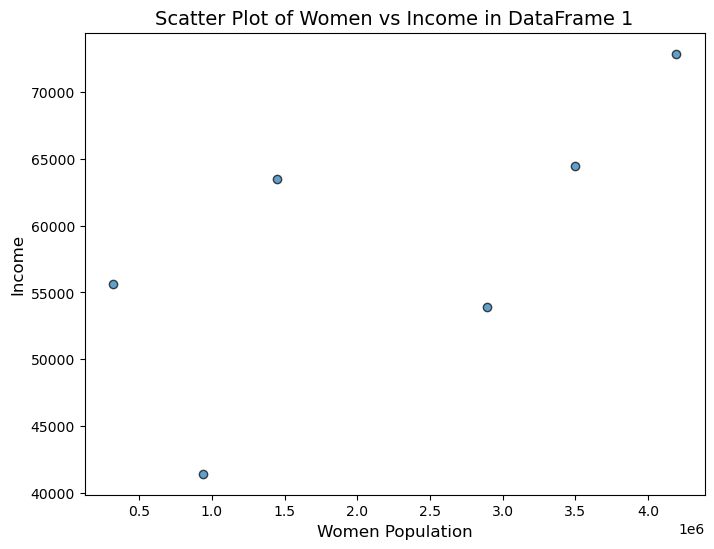

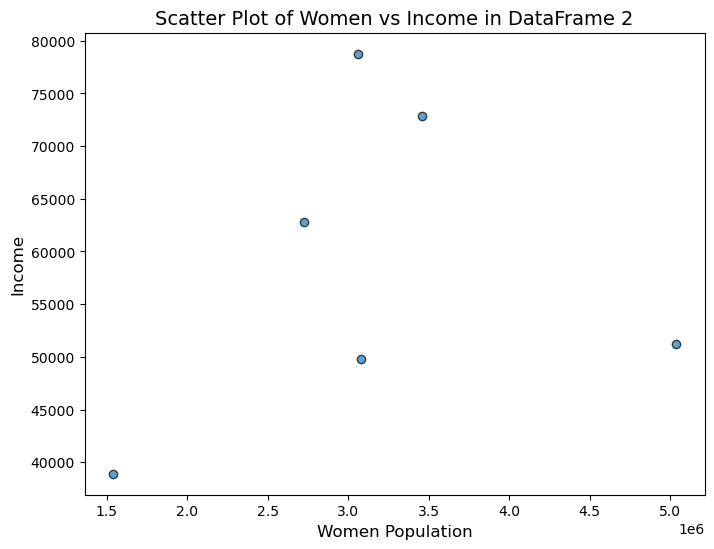

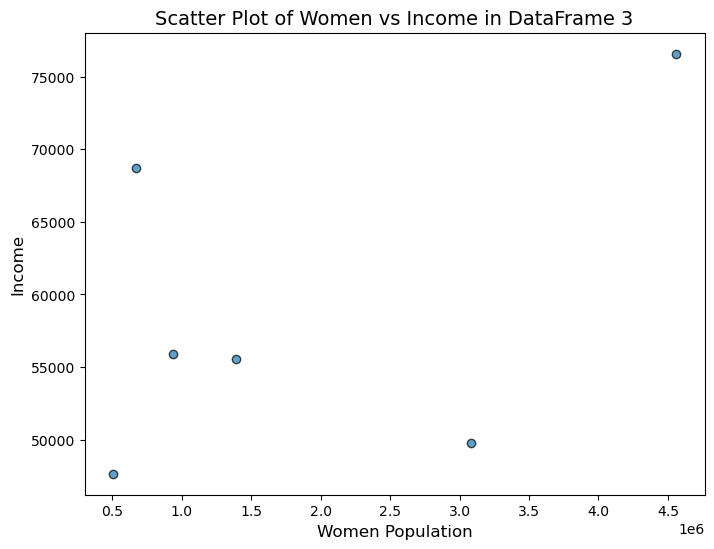

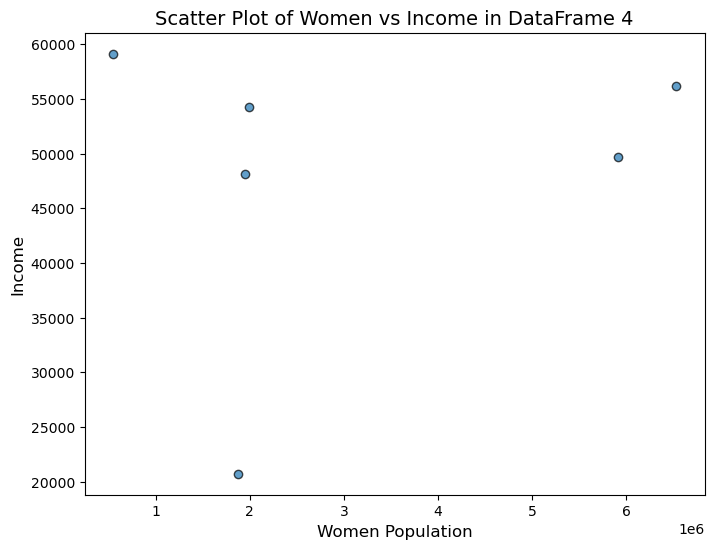

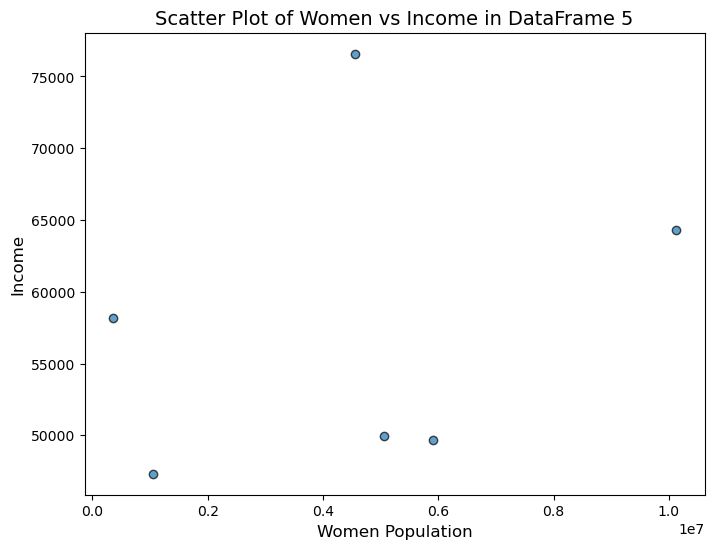

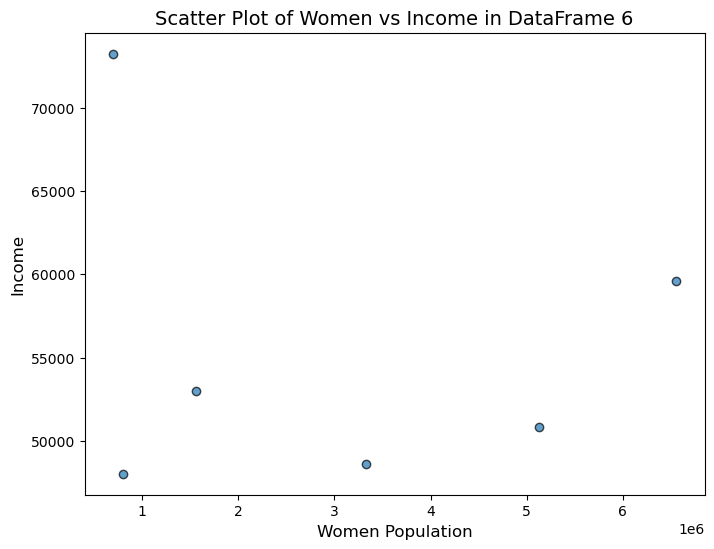

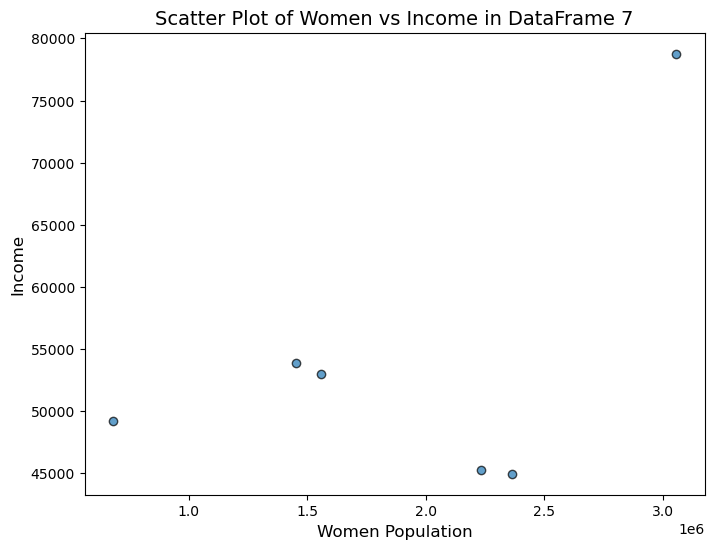

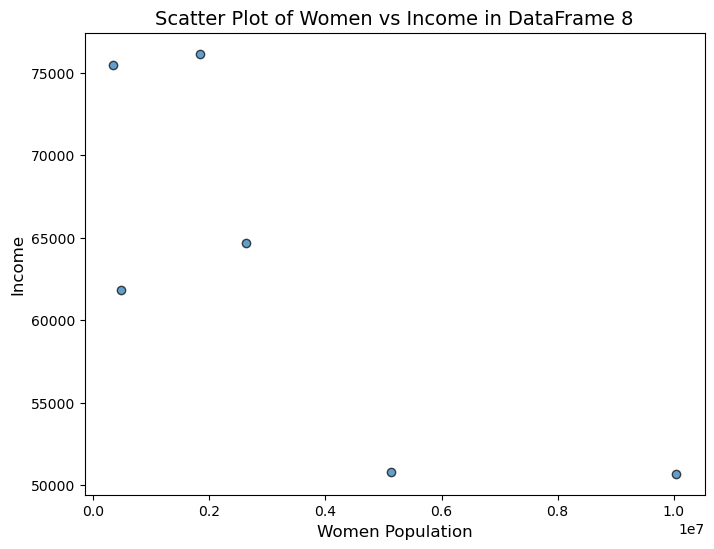

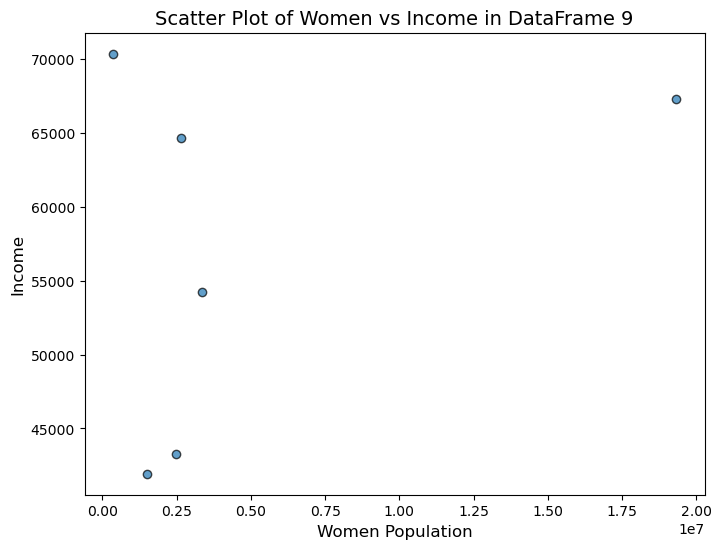

In [26]:
import matplotlib.pyplot as plt

for i, df in enumerate(df_list):
    if 'Women' in df.columns and 'Income' in df.columns:
        # Create scatterplot
        plt.figure(figsize=(8, 6))
        plt.scatter(df['Women'], df['Income'], alpha=0.7, edgecolors='black')

        # Add labels and title
        plt.title(f'Scatter Plot of Women vs Income in DataFrame {i}', fontsize=14)
        plt.xlabel('Women Population', fontsize=12)
        plt.ylabel('Income', fontsize=12)

        # Display the scatterplot
        plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [27]:
for i, df in enumerate(df_list):
    print(f"Columns in DataFrame {i}:")
    print(df.columns)

Columns in DataFrame 0:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Columns in DataFrame 1:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Columns in DataFrame 2:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Columns in DataFrame 3:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Columns in DataFrame 4:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Columns in DataFrame 5:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Bl

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

Processing DataFrame 0...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

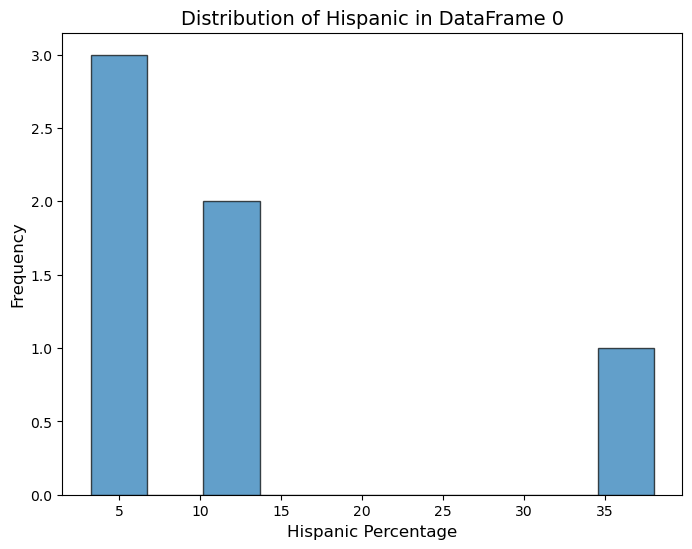

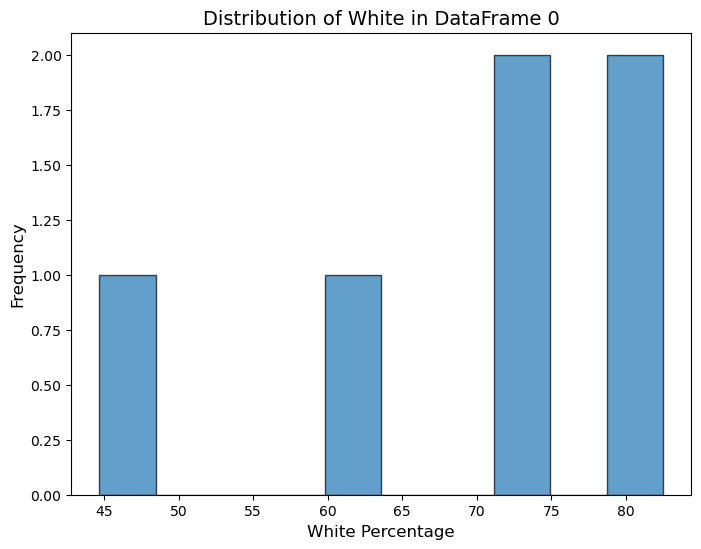

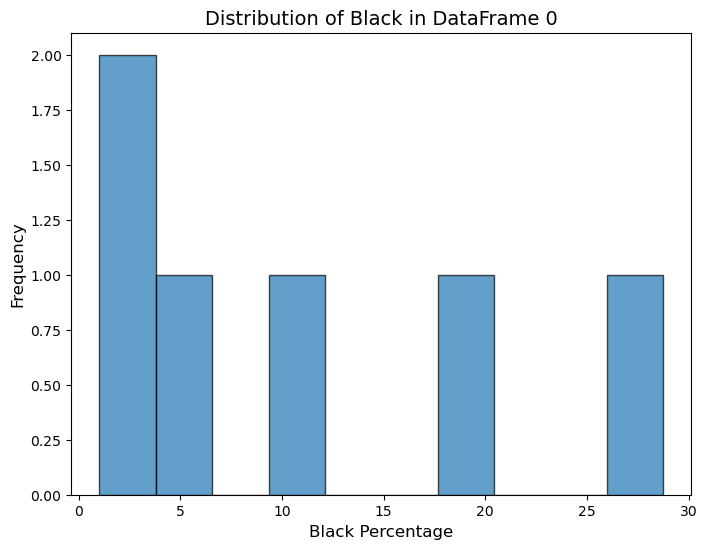

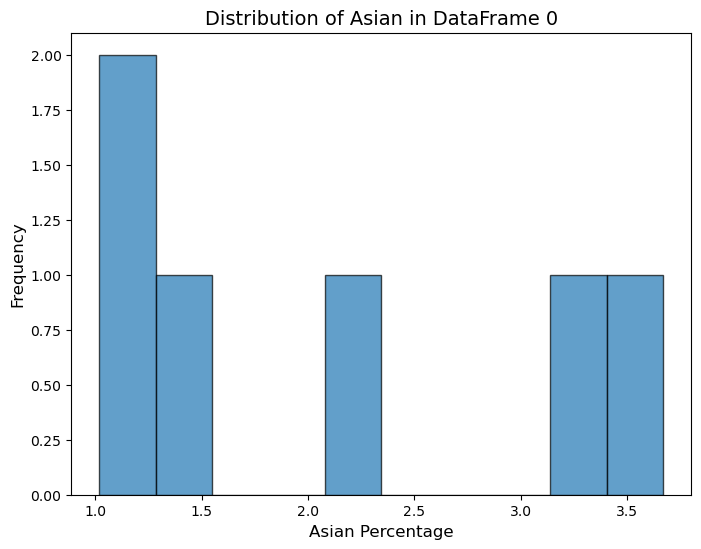

Processing DataFrame 1...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

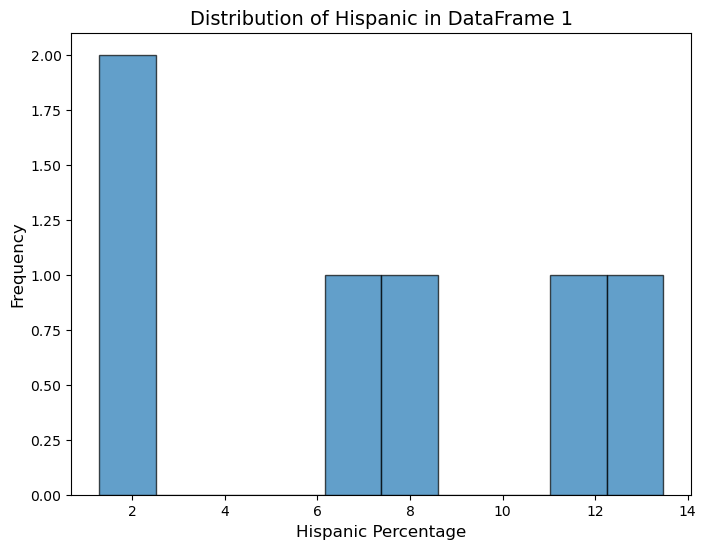

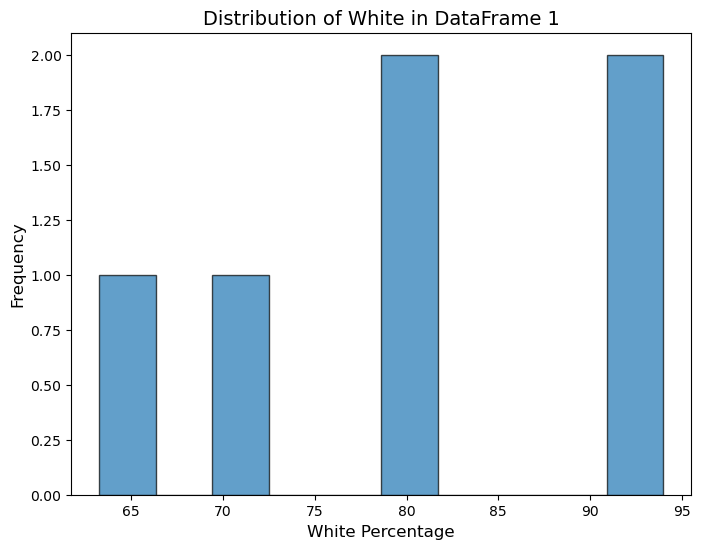

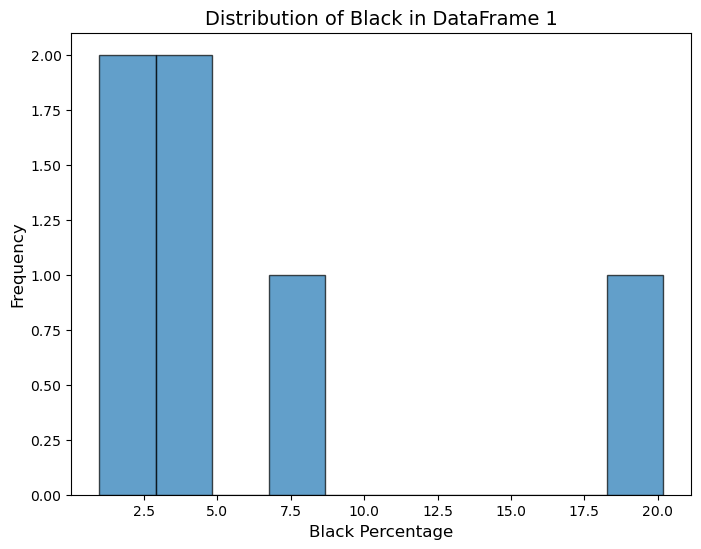

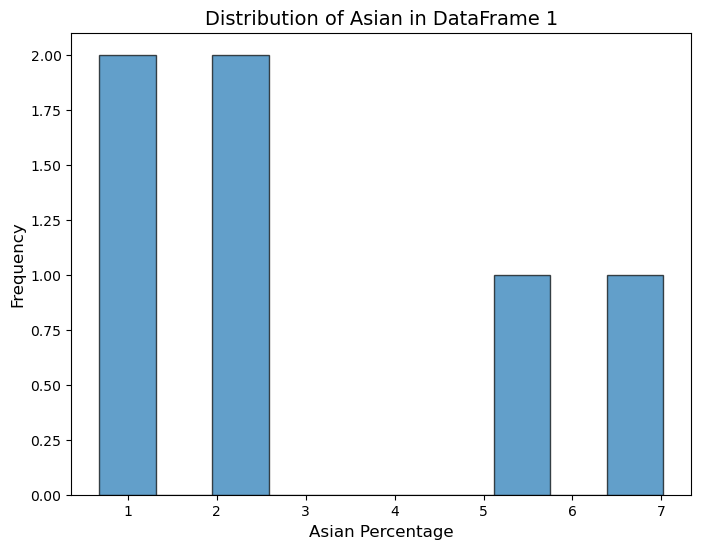

Processing DataFrame 2...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

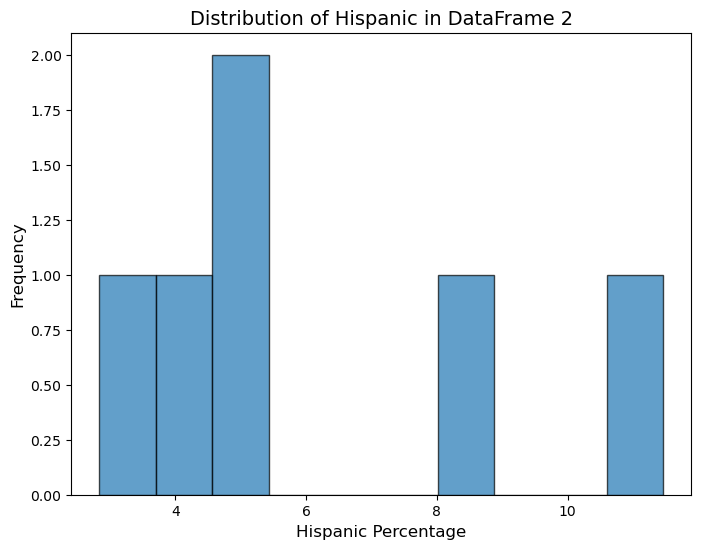

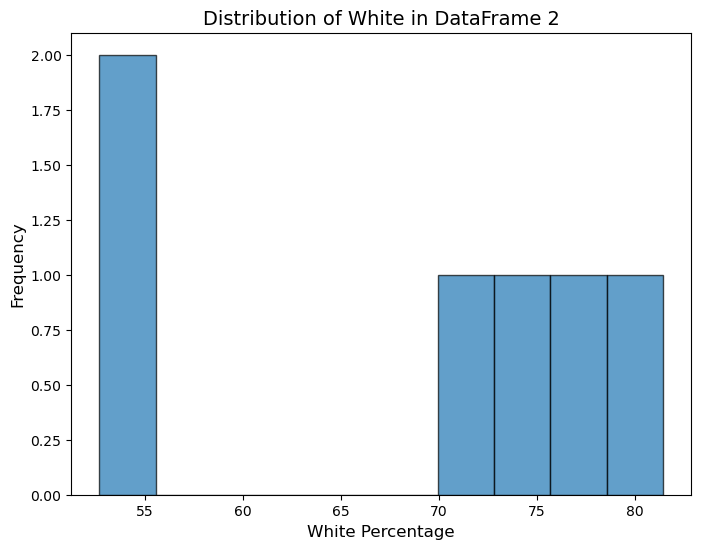

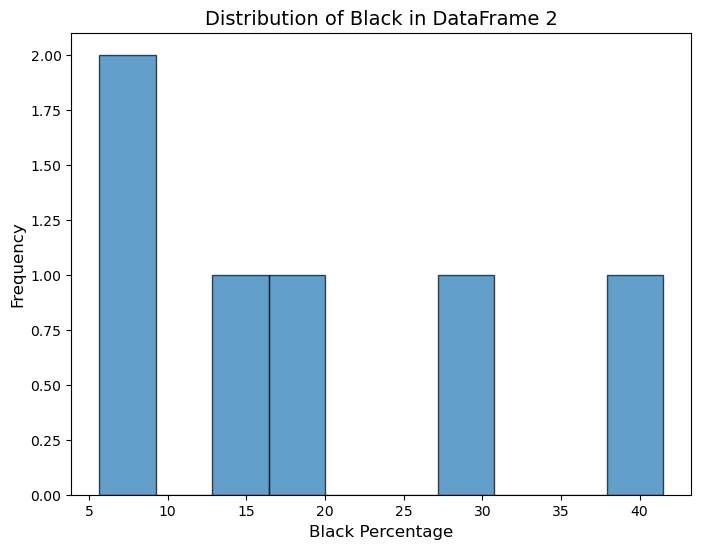

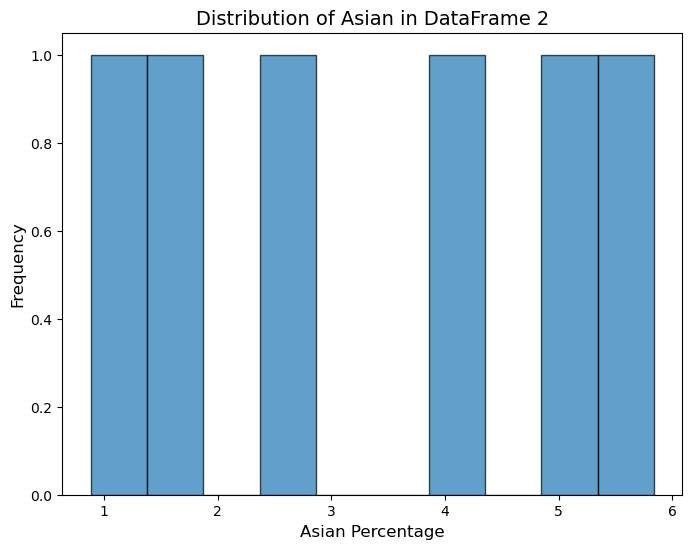

Processing DataFrame 3...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

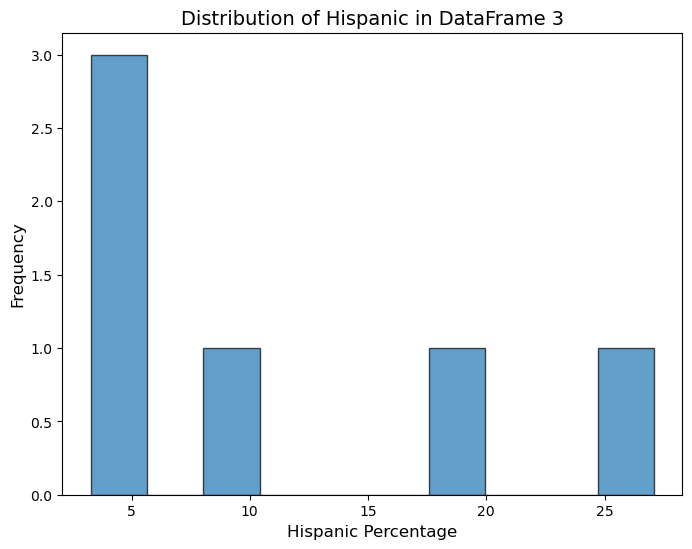

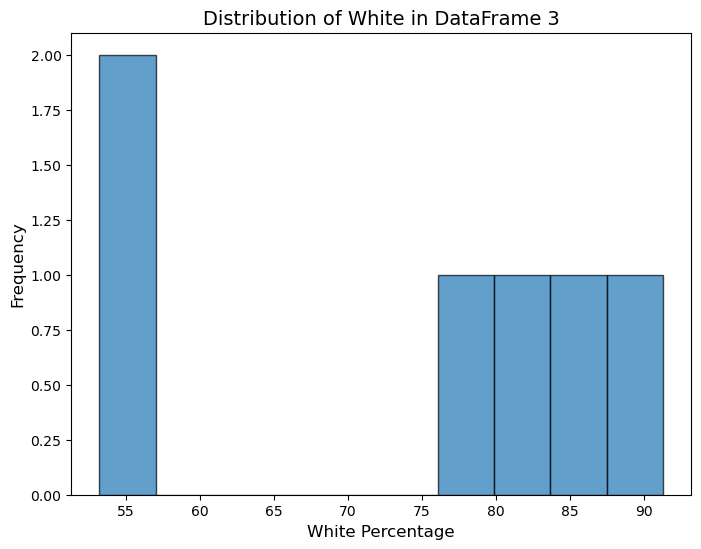

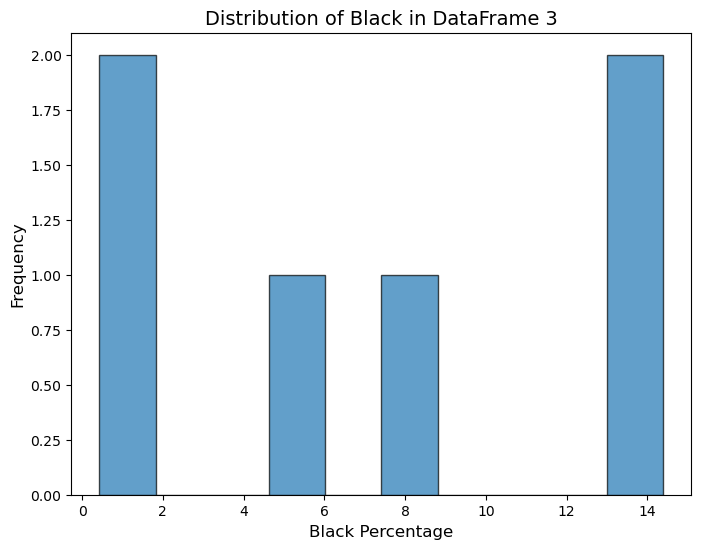

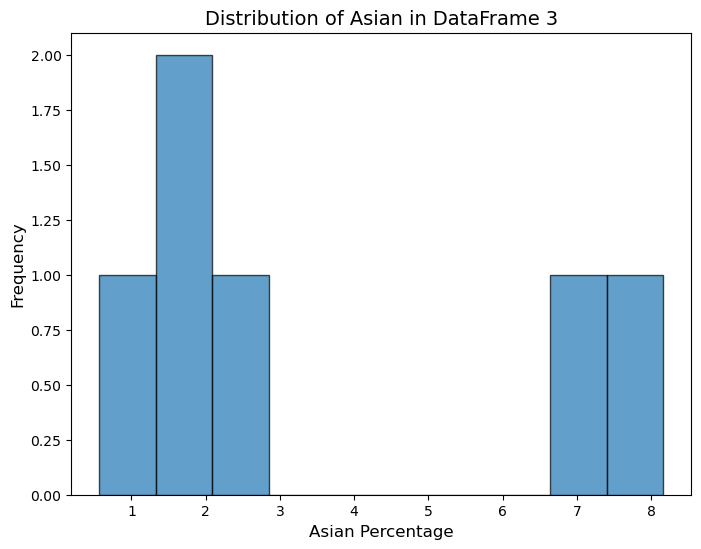

Processing DataFrame 4...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

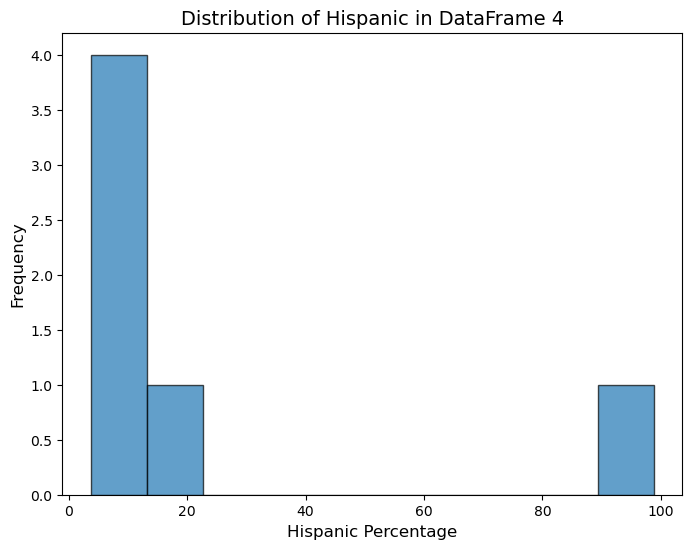

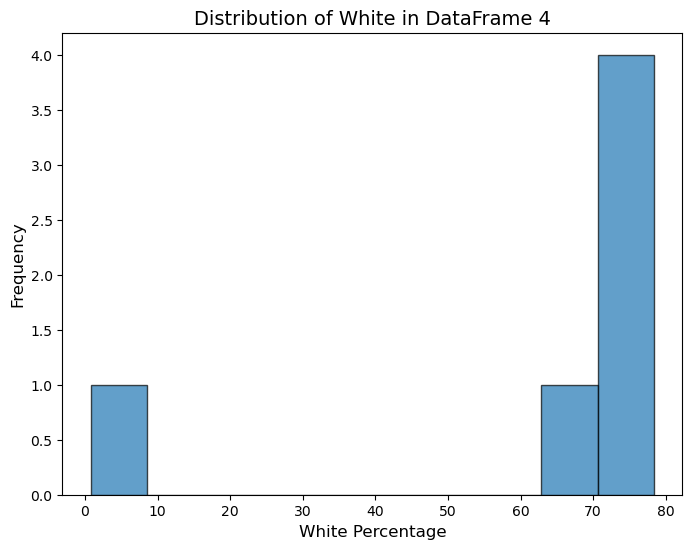

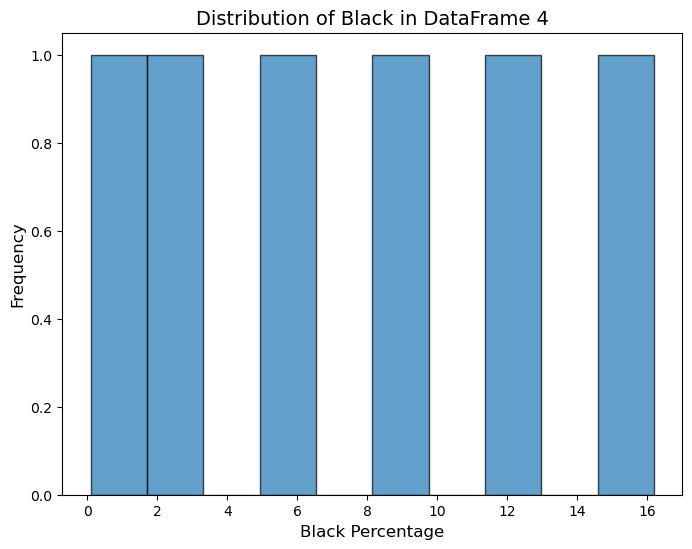

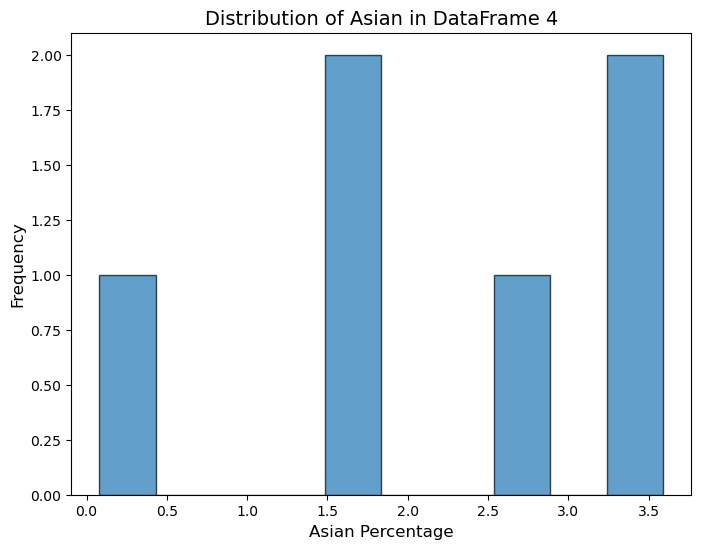

Processing DataFrame 5...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

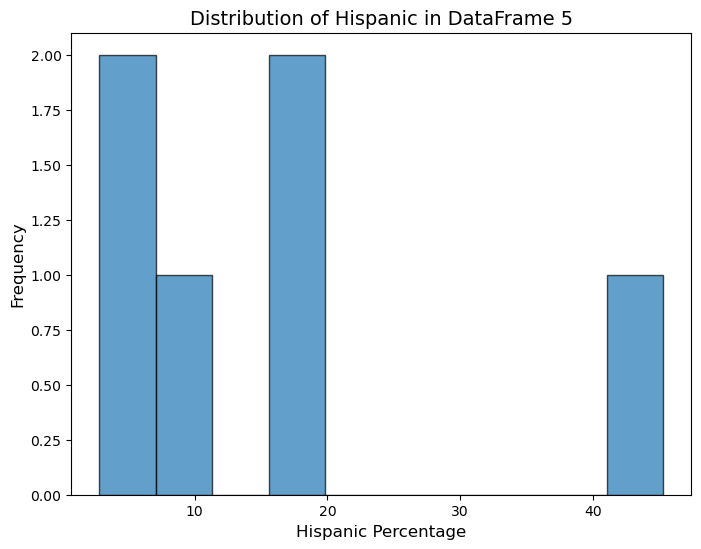

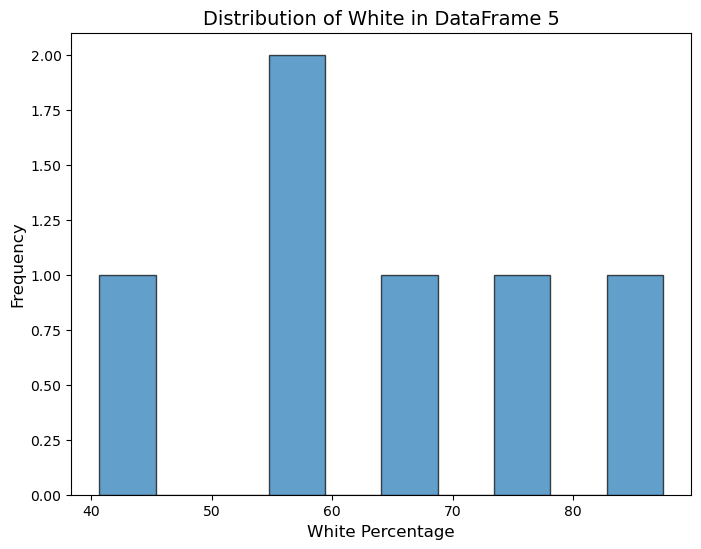

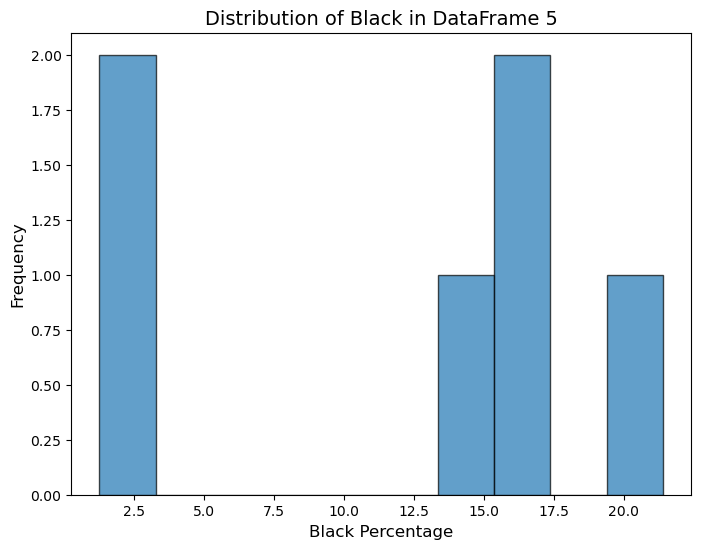

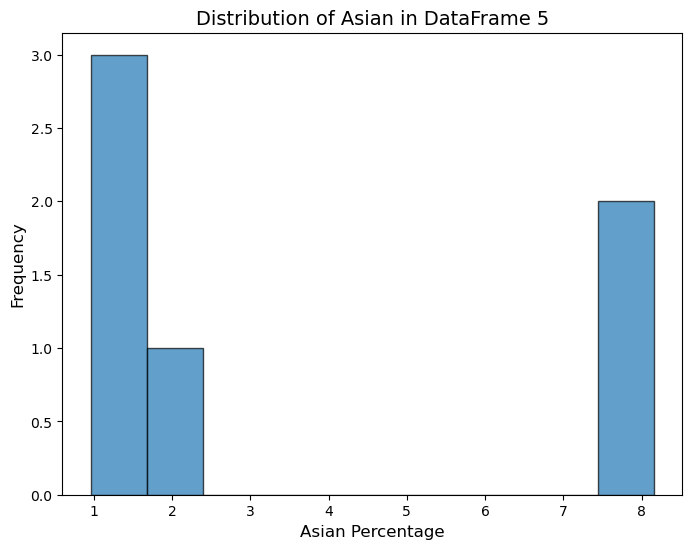

Processing DataFrame 6...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

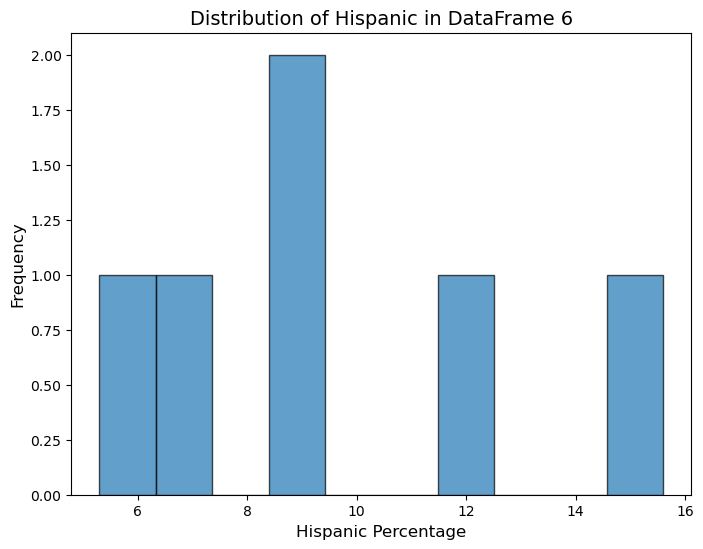

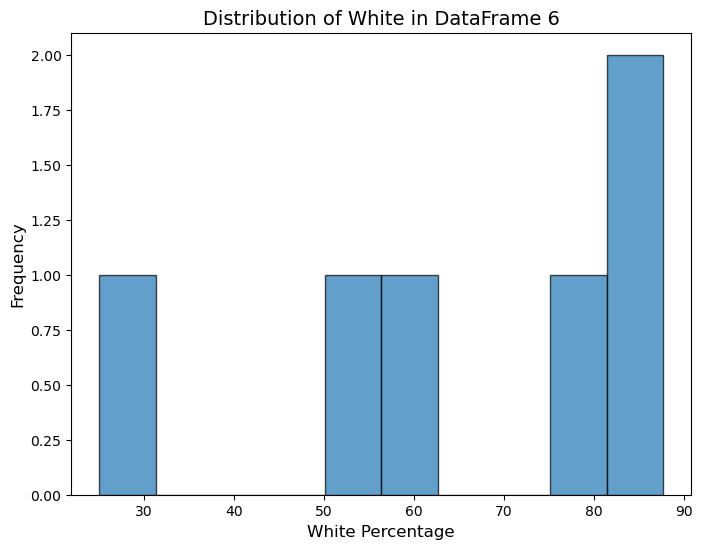

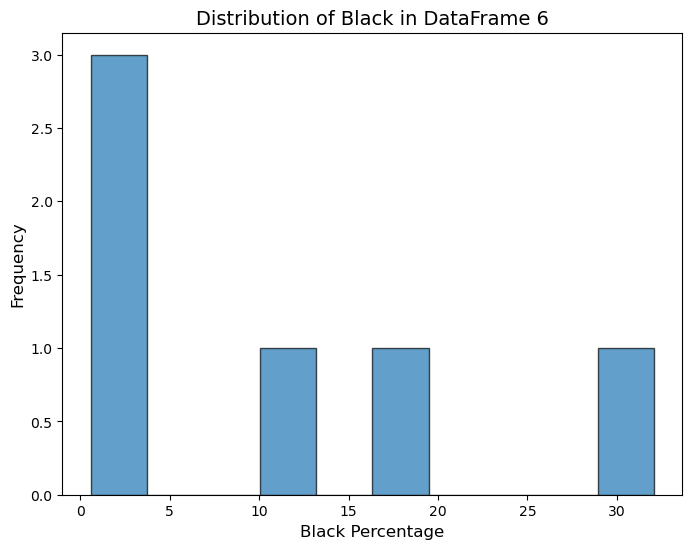

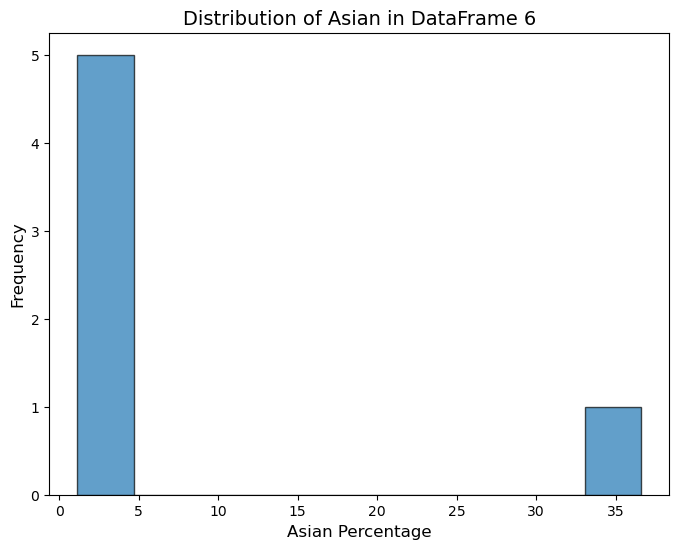

Processing DataFrame 7...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

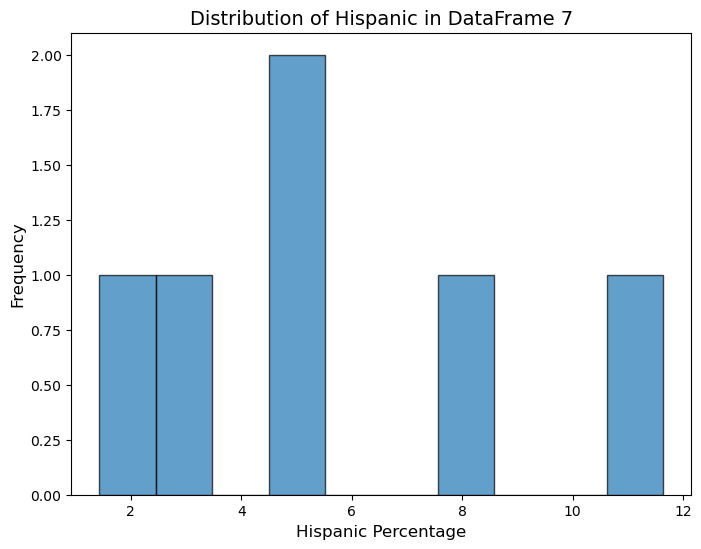

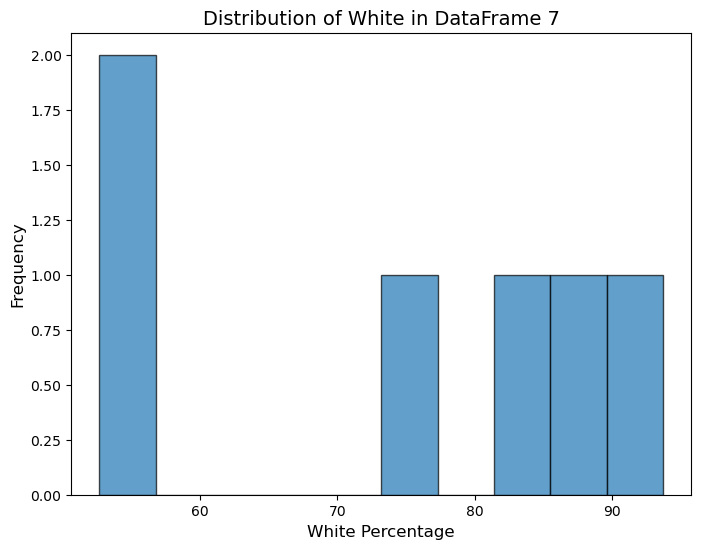

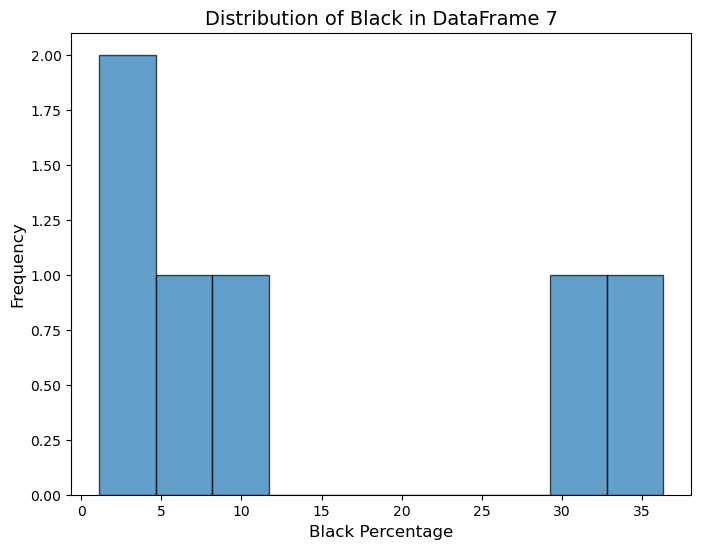

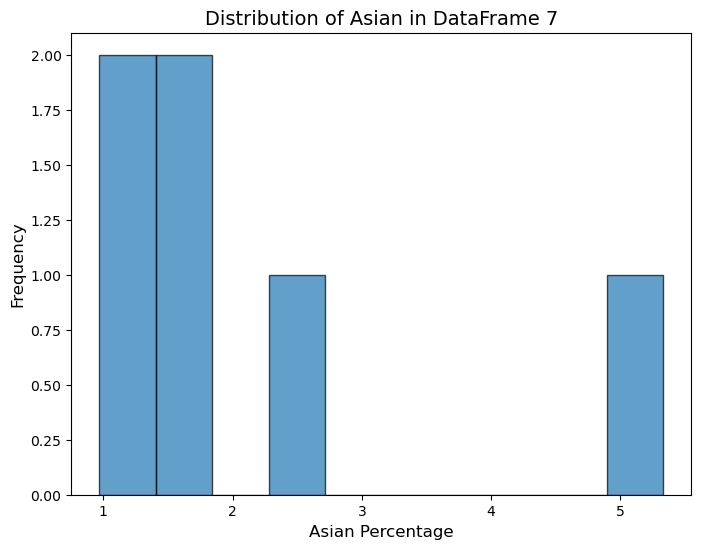

Processing DataFrame 8...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

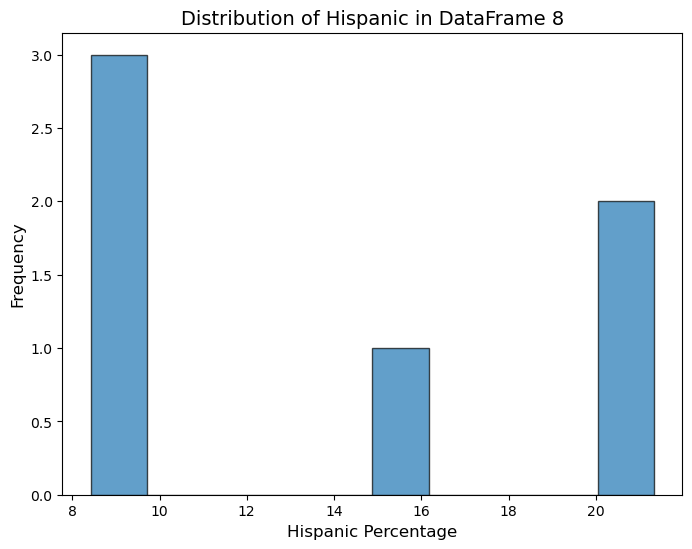

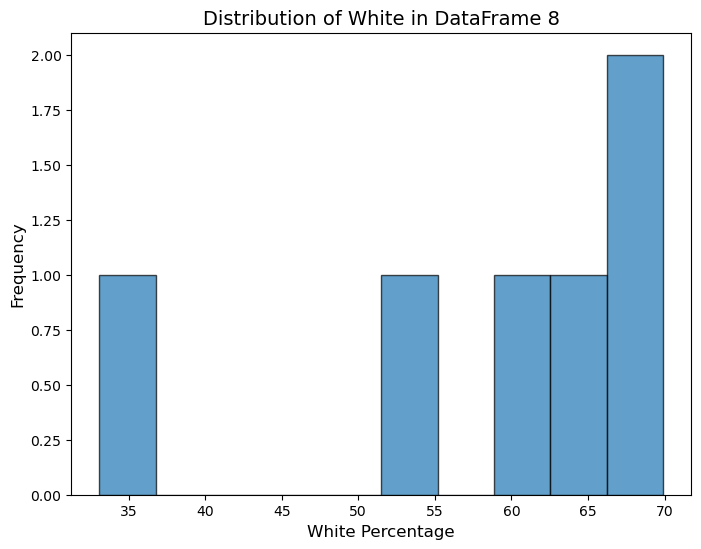

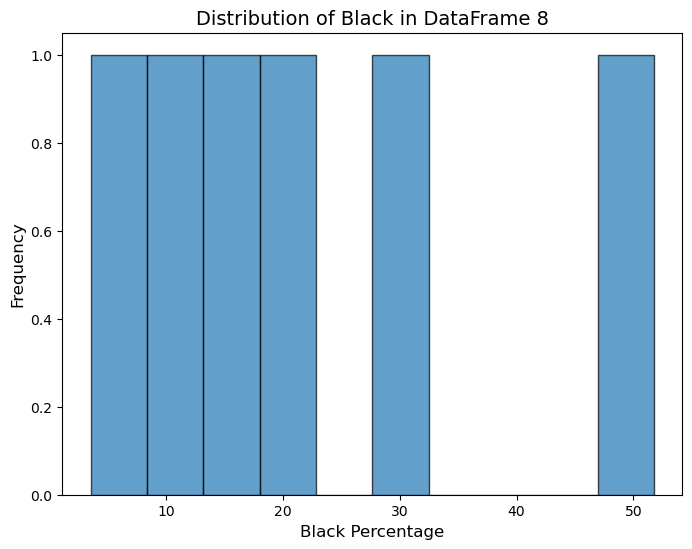

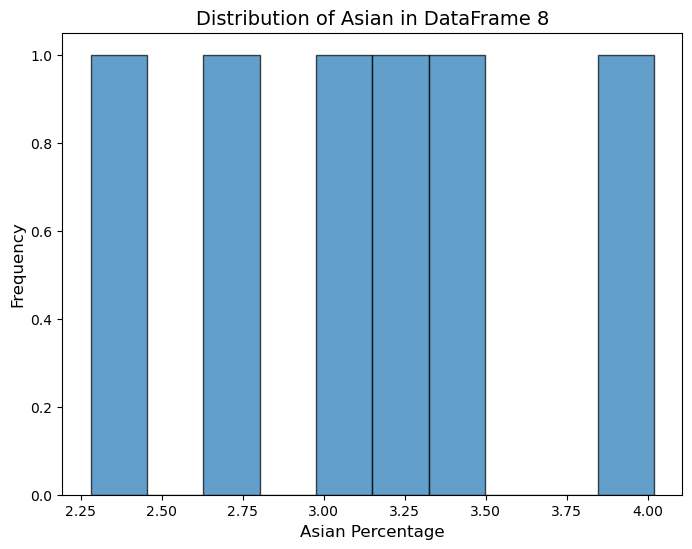

Processing DataFrame 9...


/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[race].fillna(0, inplace=True)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_5924/3717614394.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

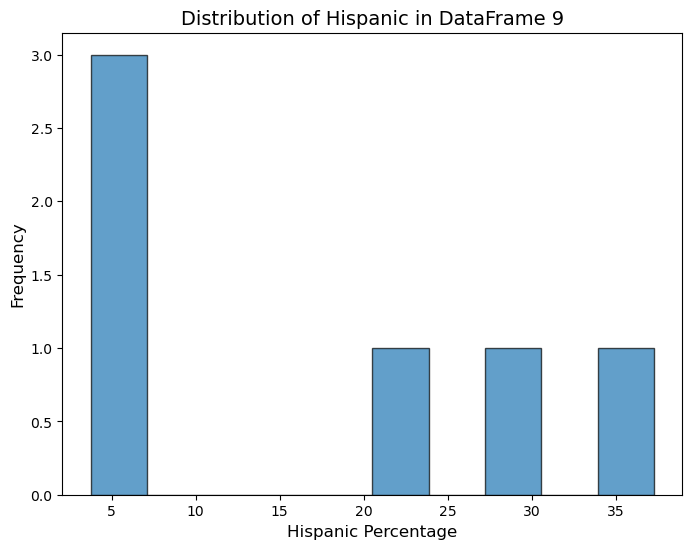

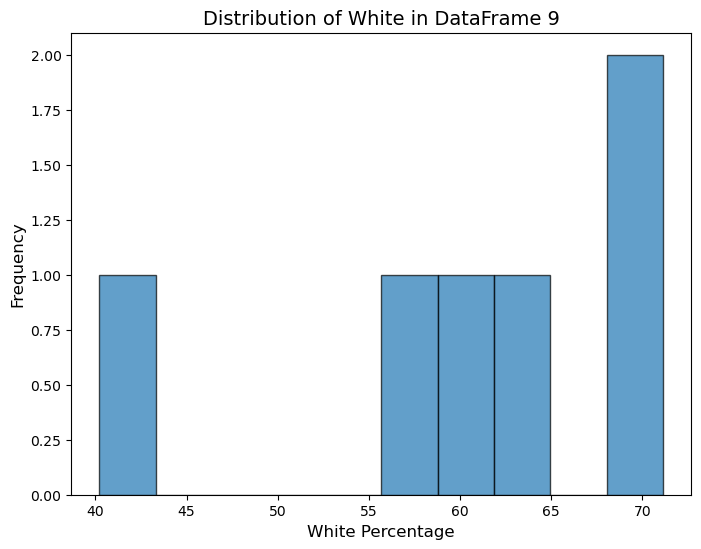

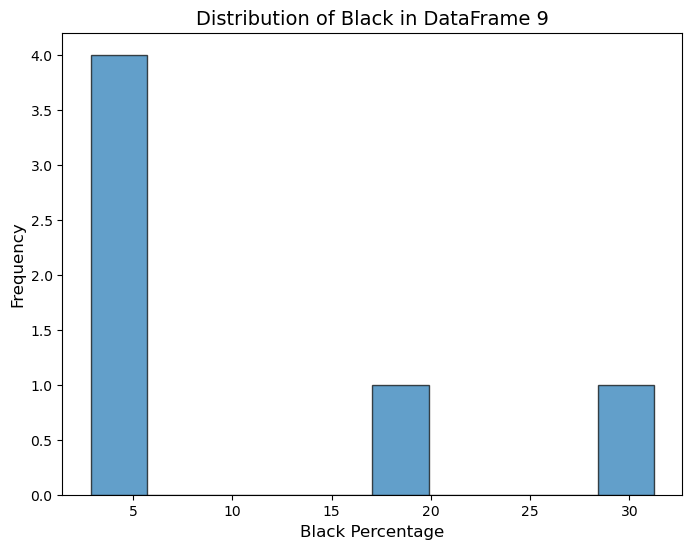

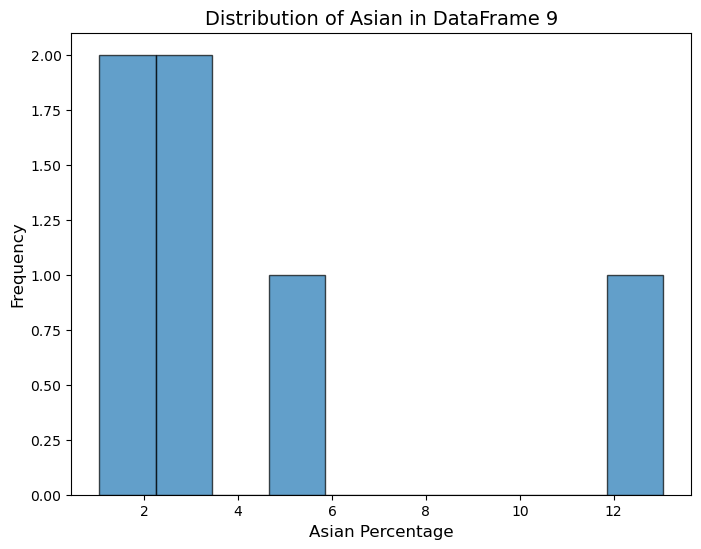

In [31]:
import matplotlib.pyplot as plt
import numpy as np

for i, df in enumerate(df_list):
    print(f"Processing DataFrame {i}...")

    # Identify race-related columns
    race_columns = [col for col in df.columns if 'Race' in col or col in ['White', 'Black', 'Asian', 'Hispanic']]

    # Convert to numeric and clean data
    for race in race_columns:
        if race in df.columns:
            # Remove '%' and convert to numeric
            df[race] = df[race].str.replace('%', '', regex=False).replace('', np.nan).astype(float)

            # Fill NaN values with 0 (or another sensible default, e.g., mean or median)
            df[race].fillna(0, inplace=True)

    # Check and drop duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"DataFrame {i} contains {duplicates} duplicate rows. Dropping them.")
        df.drop_duplicates(inplace=True)

    # Create histograms for race columns
    for race in race_columns:
        if race in df.columns:
            plt.figure(figsize=(8, 6))
            plt.hist(df[race], bins=10, edgecolor='black', alpha=0.7)

            # Add labels and title
            plt.title(f'Distribution of {race} in DataFrame {i}', fontsize=14)
            plt.xlabel(f'{race} Percentage', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)

            # Display the histogram
            plt.show()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.